In [359]:
import pandas as pd
import numpy as np
import csv
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [361]:
folder_path = "D:/Sailaja/Guvi/AIML/Mini Project 6 - Resource Management/DataSets/"

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, encoding='cp1252')   # FIX
    df_list.append(df)
    
merged_HR_data = pd.concat(df_list, ignore_index=True)

merged_HR_data.to_csv('merged_HR_Visual_data.csv', index=False)

In [362]:
data = pd.read_csv("merged_HR_Visual_data.csv")

In [363]:
data.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
data.shape

(195145, 25)

In [365]:
data.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [367]:
data.dtypes

State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                                  object
Class                                  object
NIC Name                               object
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

In [373]:
data['India/States'].value_counts()

India/States
STATE - WEST BENGAL                      749
STATE - RAJASTHAN                        748
District - North Twenty Four Parganas    743
STATE - KARNATAKA                        741
STATE - TAMIL NADU                       736
                                        ... 
District - Kaushambi                      12
District - Mahe                           12
District - Kannauj                        10
District - Mainpuri                        9
District - Baghpat                         4
Name: count, Length: 491, dtype: int64

In [375]:
data.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [377]:
data.duplicated().sum()

0

In [379]:
data.describe(include='object') 

,State Code,District Code,India/States,Division,Group,Class,NIC Name
count,195145,195145,195145,195145,195145,195145,195145
unique,23,472,491,89,241,423,587
top,`08,`000,STATE - WEST BENGAL,`47,`000,`0000,Construction of buildings
freq,21662,14715,749,12246,31682,96924,1446


In [381]:
data['State Code'] = data['State Code'].astype(str).str.replace('`', '').astype(int)

In [383]:
data.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,7,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,7,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,7,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,7,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
data['District Code'] = data['District Code'].astype(str).str.replace('`', '').astype(int)
data['Division'] = data['Division'].astype(str).str.replace('`', '').astype(int)
data['Group'] = data['Group'].astype(str).str.replace('`', '').astype(int)
data['Class'] = data['Class'].astype(str).str.replace('`', '').astype(int)

In [387]:
data.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [389]:
# Remove leading/trailing spaces from string columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [391]:
data.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [393]:
data.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [395]:
# List of specific columns to rename
cols_to_rename = ['State Code', 'District Code', 'NIC Name']

# Apply transformation only to selected columns
data.rename(columns={col: col.replace(" ", "_") for col in cols_to_rename}, inplace=True)


In [397]:
data.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
data[["State/District", "State/District_Name"]] = data["India/States"].str.split(" - ", n=1, expand=True)

In [400]:
data.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,State/District,State/District_Name
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,44743,16266,1969,1494,475,59040,43249,15791,STATE,NCT OF DELHI
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,150,74,23,13,10,201,137,64,STATE,NCT OF DELHI
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,...,65,27,14,12,2,78,53,25,STATE,NCT OF DELHI
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,27,10,8,6,2,29,21,8,STATE,NCT OF DELHI
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,STATE,NCT OF DELHI


In [413]:
data = data[data["NIC_Name"] != "Total"]
data = data[data["Class"] != 0]

In [415]:
data.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,State/District,State/District_Name
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,27,10,8,6,2,29,21,8,STATE,NCT OF DELHI
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,STATE,NCT OF DELHI
5,7,0,STATE - NCT OF DELHI,1,11,113,"Growing of vegetables and melons, roots and tu...",42,34,8,...,35,17,6,6,0,46,29,17,STATE,NCT OF DELHI
6,7,0,STATE - NCT OF DELHI,1,11,116,Growing of fibre crops,6,6,0,...,0,0,0,0,0,0,0,0,STATE,NCT OF DELHI
7,7,0,STATE - NCT OF DELHI,1,11,119,Growing of other non-perennial crop,29,21,8,...,3,0,0,0,0,3,3,0,STATE,NCT OF DELHI


In [417]:
state_code_map = {
    1: "Jammu & Kashmir", 2: "Himachal Pradesh", 3: "Punjab", 4: "Chandigarh",
    5: "Uttarakhand", 6: "Haryana", 7: "Delhi", 8: "Rajasthan", 9: "Uttar Pradesh",
    10: "Bihar", 11: "Sikkim", 12: "Arunachal Pradesh", 13: "Nagaland", 14: "Manipur",
    15: "Mizoram", 16: "Tripura", 17: "Meghalaya", 18: "Assam", 19: "West Bengal",
    20: "Jharkhand", 21: "Odisha", 22: "Chhattisgarh", 23: "Madhya Pradesh",
    24: "Gujarat", 25: "Daman & Diu", 26: "Dadra & Nagar Haveli", 27: "Maharashtra",
    28: "Andhra Pradesh", 29: "Karnataka", 30: "Goa", 31: "Lakshadweep", 32: "Kerala",
    33: "Tamil Nadu", 34: "Puducherry", 35: "Andaman & Nicobar Islands"
}

# Create new column 'state_name' based on state_code
data["state_name"] = data["State_Code"].map(state_code_map)

In [419]:
data.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,State/District,State/District_Name,state_name
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,STATE,NCT OF DELHI,Delhi
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,STATE,NCT OF DELHI,Delhi
5,7,0,STATE - NCT OF DELHI,1,11,113,"Growing of vegetables and melons, roots and tu...",42,34,8,...,17,6,6,0,46,29,17,STATE,NCT OF DELHI,Delhi
6,7,0,STATE - NCT OF DELHI,1,11,116,Growing of fibre crops,6,6,0,...,0,0,0,0,0,0,0,STATE,NCT OF DELHI,Delhi
7,7,0,STATE - NCT OF DELHI,1,11,119,Growing of other non-perennial crop,29,21,8,...,0,0,0,0,3,3,0,STATE,NCT OF DELHI,Delhi


In [421]:
# Remove rows where 'India/States' contains 'STATE -'
data = data[~data["India/States"].str.contains("STATE -", case=False, na=False)]

In [423]:
data.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,State/District,State/District_Name,state_name
723,7,90,District - North West,1,11,111,"Growing of cereals (except rice), leguminous c...",26,24,2,...,4,2,0,2,5,3,2,District,North West,Delhi
724,7,90,District - North West,1,11,112,Growing of rice,3,3,0,...,0,0,0,0,0,0,0,District,North West,Delhi
725,7,90,District - North West,1,11,113,"Growing of vegetables and melons, roots and tu...",12,9,3,...,0,6,6,0,0,0,0,District,North West,Delhi
726,7,90,District - North West,1,11,116,Growing of fibre crops,3,3,0,...,0,0,0,0,0,0,0,District,North West,Delhi
727,7,90,District - North West,1,11,119,Growing of other non-perennial crop,21,15,6,...,0,0,0,0,0,0,0,District,North West,Delhi


In [425]:
data = data.drop(columns=["State/District"])

In [427]:
data = data.rename(columns={
    "state_name": "State",
    "State/District_Name": "District"
})

In [429]:
data = data.reset_index(drop=True)

In [431]:
data.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,District,State
0,7,90,District - North West,1,11,111,"Growing of cereals (except rice), leguminous c...",26,24,2,...,3,4,2,0,2,5,3,2,North West,Delhi
1,7,90,District - North West,1,11,112,Growing of rice,3,3,0,...,0,0,0,0,0,0,0,0,North West,Delhi
2,7,90,District - North West,1,11,113,"Growing of vegetables and melons, roots and tu...",12,9,3,...,6,0,6,6,0,0,0,0,North West,Delhi
3,7,90,District - North West,1,11,116,Growing of fibre crops,3,3,0,...,0,0,0,0,0,0,0,0,North West,Delhi
4,7,90,District - North West,1,11,119,Growing of other non-perennial crop,21,15,6,...,0,0,0,0,0,0,0,0,North West,Delhi


In [433]:
data['text_length'] = data['NIC_Name'].str.len()
data['text_length'].head()

0    64
1    15
2    50
3    22
4    35
Name: text_length, dtype: int64

In [435]:
#Feature Engineering

In [437]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [439]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data["clean_NIC_Name"] = data["NIC_Name"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [440]:
data[["clean_NIC_Name"]].head()

,clean_NIC_Name
0,growing cereal except rice leguminous crop oil...
1,growing rice
2,growing vegetable melon root tuber
3,growing fibre crop
4,growing nonperennial crop


In [443]:
def clean_text_kmeans(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # remove generic business words that confuse clustering
    remove_words = [
        'activity', 'services', 'business', 'industry',
        'other', 'related', 'n.e.c', 'nec'
    ]
    
    tokens = text.split()
    tokens = [t for t in tokens if t not in remove_words]
    return " ".join(tokens)

data["clean_NIC_Name"] = data["clean_NIC_Name"].apply(clean_text_kmeans)


In [445]:
data[["clean_NIC_Name"]].head()

,clean_NIC_Name
0,growing cereal except rice leguminous crop oil...
1,growing rice
2,growing vegetable melon root tuber
3,growing fibre crop
4,growing nonperennial crop


In [447]:
#Feature Extraction (TF-IDF)

In [449]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1,3),
    min_df=2,          # removes noise
    max_df=0.85       # removes generic words
)

X = vectorizer.fit_transform(data["clean_NIC_Name"])


In [451]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=25,
    random_state=65,
    n_init=30
)

data["cluster"] = kmeans.fit_predict(X)


In [459]:
#Understanding Clusters (Interpretation)

In [461]:
import numpy as np

terms = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}")
    center = kmeans.cluster_centers_[i]
    top_indices = center.argsort()[::-1][:10]
    top_terms = [terms[ind] for ind in top_indices]
    print(", ".join(top_terms))


Cluster 0
education, primary education, primary, secondary, secondary education, higher education, higher, general secondary, general secondary education, cultural

Cluster 1
service, support, support service, transportation, food service, information, personal service, personal, food, information service

Cluster 2
metal, metal product, fabricated metal product, fabricated metal, fabricated, product, nonferrous, nonferrous metal, manufacture fabricated, manufacture fabricated metal

Cluster 3
retail, retail sale, sale, store, specialized, specialized store, good, stall, stall market, market

Cluster 4
article, manufacture article, manufacture, wood, jewellery, jewellery article, manufacture jewellery, manufacture jewellery article, manufacture product, manufacture product wood

Cluster 5
motor, motor vehicle, vehicle, sale motor vehicle, sale motor, maintenance repair motor, repair motor, repair motor vehicle, part accessory, accessory

Cluster 6
organization, membership organization

In [108]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, data['cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.11631068051339298


In [471]:
cluster_label_map = {
    0: "Education & Cultural Services",
    1: "General & Personal Services",
    2: "Metal & Fabricated Products Manufacturing",
    3: "Retail Trade & Specialized Stores",
    4: "Wood & Jewellery Manufacturing",
    5: "Motor Vehicle Sales & Repair",
    6: "Organizations & Associations",
    7: "Public Administration & Building Services",
    8: "Crop Production & Agriculture Support",
    9: "Beverage & Tobacco Manufacturing/Wholesale",
    10: "Construction & Infrastructure Projects",
    11: "Passenger & Freight Transport",
    12: "Telecommunications & Equipment",
    13: "Household Goods & Repair Services",
    14: "Food & Dairy Manufacturing",
    15: "Animal Husbandry & Poultry Farming",
    16: "Security & Social Protection Services",
    17: "Textile, Apparel & Manufacturing",
    18: "Social Work & Accommodation Services",
    19: "Machinery & Equipment Repair/Manufacturing",
    20: "Public Services & Miscellaneous Activities",
    21: "Computers & Software Services",
    22: "Insurance & Financial Services",
    23: "Medical & Dental Services",
    24: "Mining & Quarrying (Clay/Stone)"
}



In [473]:
data['Industry_Category'] = data['cluster'].map(cluster_label_map)

In [475]:
data = data.rename(columns={'Main Workers - Total -  Persons':'Main_Workers-Total-Persons',
                            'Main Workers - Total - Males': 'Main_Workers-Total-Males',
                             'Main Workers - Total - Females': 'Main_Workers-Total-Females',
                             'Main Workers - Rural -  Persons':	'Main_Workers-Rural-Persons',
                             'Main Workers - Rural - Males':	'Main_Workers-Rural-Males',
                             'Main Workers - Rural - Females':	'Main_Workers-Rural-Females',
                             'Main Workers - Urban -  Persons':	'Main_Workers-Urban-Persons',
                              'Main Workers - Urban - Males': 'Main_Workers-Urban-Males',
                              'Main Workers - Urban - Females':	'Main_Workers-Urban-Females',
                              'Marginal Workers - Total -  Persons':	'Marginal_Workers-Total-Persons',
                              'Marginal Workers - Total - Males':	'Marginal_Workers-Total-Males',
                               'Marginal Workers - Total - Females':	 'Marginal_Workers-Total-Females',
                               'Marginal Workers - Rural -  Persons': 'Marginal_Workers-Rural-Persons',
                               'Marginal Workers - Rural - Males':	'Marginal_Workers-Rural-Males',
                               'Marginal Workers - Rural - Females':	 'Marginal_Workers-Rural-Females',
                               'Marginal Workers - Urban -  Persons': 'Marginal_Workers-Urban-Persons',
                               'Marginal Workers - Urban - Males':	 'Marginal_Workers-Urban-Males',
                               'Marginal Workers - Urban - Females':	'Marginal_Workers-Urban-Females'                        
                           })


In [477]:
data.to_csv("Industry_cluster.csv")

Clusters: 4, Silhouette Score: 0.0234
Clusters: 5, Silhouette Score: 0.0273
Clusters: 6, Silhouette Score: 0.0352
Clusters: 7, Silhouette Score: 0.0369
Clusters: 8, Silhouette Score: 0.0425
Clusters: 9, Silhouette Score: 0.0473
Clusters: 10, Silhouette Score: 0.0536
Clusters: 11, Silhouette Score: 0.0551
Clusters: 12, Silhouette Score: 0.0571
Clusters: 13, Silhouette Score: 0.0652
Clusters: 14, Silhouette Score: 0.0739
Clusters: 15, Silhouette Score: 0.0742
Clusters: 16, Silhouette Score: 0.0778
Clusters: 17, Silhouette Score: 0.0828
Clusters: 18, Silhouette Score: 0.0863
Clusters: 19, Silhouette Score: 0.0919


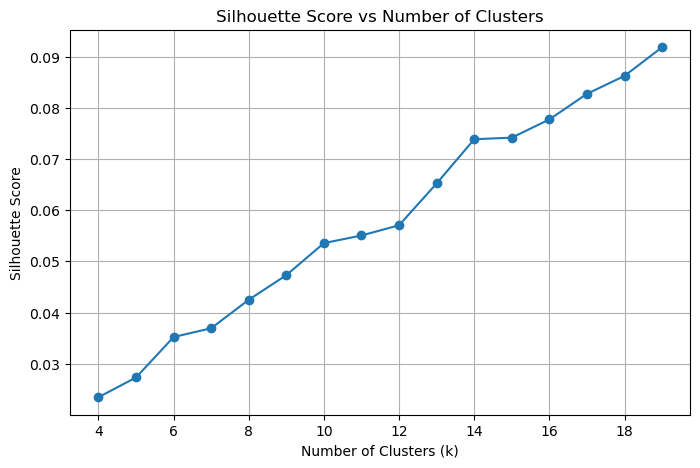

In [97]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
cluster_range = range(4, 20)  # test clusters from 4 to 19

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

# --- Plot the scores ---
plt.figure(figsize=(8,5))
plt.plot(cluster_range, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
